# Simple Linear Regression (Gapminder Project)

In this project you are going to work with __gapminder__ dataset, which tracks economic and social indicators like population, life expectancy and the GDP per capita of countries over time. For more information about Gapminder, visit the this [link](https://www.gapminder.org/data/)

This is a guided project, which I will guide you through to proceed with this small project. I believe this method will prepare you for your own future projects.

In order to do this project, you may need to refer to this [tutorial](https://github.com/DrSaadLa/PythonTuts/blob/main/ML%20with%20Python/02.01.%20Linear%20Regression%20with%20Python%20(Part%2001)%20Solution.ipynb)

### Import Necessary Modules
1. import pandas
2. import numpy 
3. import seaborn
4. import matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset

the dataset can be downloaded from [here](https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/Data/gapminder.csv). 


In [4]:
# Here is the url provided for you
url = "https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/Data/gapminder.csv"

In [2]:
# loading the data 
gap = pd.read_csv('gapminder.csv')

In [5]:
# use pd.read_csv() to import the data


In [3]:
# Check the first few obs
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
# Check the last few obs
gap.tail()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa
138,13495462.0,3.85,15.1,0.654323,22.02660,1286.0,131.9745,49.0,98.3,Sub-Saharan Africa


In [5]:
# check the data information
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [7]:
# Run desriptive statistics
gap.describe().T

,count,mean,std,min,25%,50%,75%,max
population,139.0,3.549977e+07,1.095121e+08,277315.000000,3.752776e+06,9.705130e+06,2.791973e+07,1.197070e+09
fertility,139.0,3.005108e+00,1.615354e+00,1.280000,1.810000e+00,2.410000e+00,4.095000e+00,7.590000e+00
HIV,139.0,1.915612e+00,4.408974e+00,0.060000,1.000000e-01,4.000000e-01,1.300000e+00,2.590000e+01
CO2,139.0,4.459874e+00,6.268349e+00,0.008618,4.961900e-01,2.223796e+00,6.589156e+00,4.870206e+01
BMI_male,139.0,2.462305e+01,2.209368e+00,20.397420,2.244814e+01,2.515699e+01,2.649757e+01,2.845698e+01
GDP,139.0,1.663878e+04,1.920730e+04,588.000000,2.899000e+03,9.938000e+03,2.327850e+04,1.260760e+05
BMI_female,139.0,1.267019e+02,4.471997e+00,117.375500,1.232322e+02,1.265196e+02,1.302759e+02,1.354920e+02
life,139.0,6.960288e+01,9.122189e+00,45.200000,6.220000e+01,7.200000e+01,7.685000e+01,8.260000e+01
child_mortality,139.0,4.509712e+01,4.572467e+01,2.700000,8.100000e+00,2.400000e+01,7.420000e+01,1.920000e+02


## Select Target and Feature Variable

This is a simple linear regression, so we are going to use only two variables. Suppose you wish to predict life expectancy in a given country using one variable such as GDP, fertility rate, or population. 

Before selecting the condidate input variable, we will plot a heatmap on the correlation matrix of dataset, then we select to highly correlated variable with the target, which will be __life__

### This section is done for you. 

<AxesSubplot:>

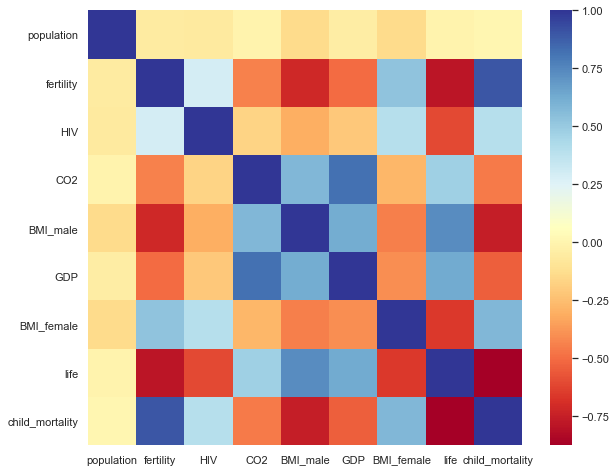

In [6]:
# Setting the figure size 
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(), cmap='RdYlBu', square=True)

From the headmap, the highly negatively correlated variable is __fertility__, which the one you are going to use to build your model. So:

Target is: __life__

Input is: __fertility__

In [8]:
# Rename life as y
y = gap['life']

In [9]:
# Rename the input variable as X
X = gap['fertility']

In [10]:
# Check the shape of y
# print("The shape of the target variable is :" )
y.shape

(139,)

In [12]:
# Check the shape of X
# print("The shape of the input variable is :" )
X.shape

(139,)

As we have seen in the lecture, we have to reshape a 1D array into a 2D array using reshape() function 

In [14]:
# reshape the target variable y
y_reshaped = np.array(y).reshape(-1, 1)

In [16]:
# reshape the input variable X
X_reshaped = np.array(X).reshape(-1, 1)

In [18]:
# print the new shape y
y_reshaped.shape

(139, 1)

In [21]:
# print the new shape of X
X_reshaped.shape

(139, 1)

### Plotting

Plot a scatter plot of the variables life and fertility.

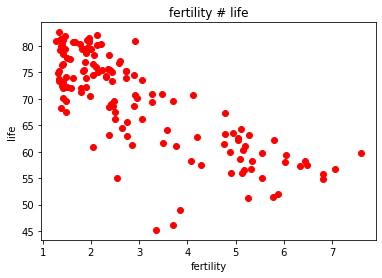

In [28]:
# plot scatter plot 
plt.xlabel('fertility')
plt.ylabel('life')
plt.title('fertility # life')
plt.scatter(gap['fertility'], gap['life'], color='red')

Ovely a fitted line on the plot using `lmplot` from seaborn package. 

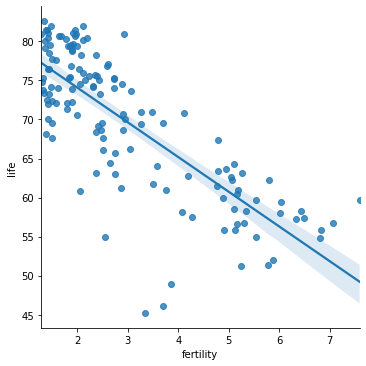

In [39]:
# plot linear regression plot.
sns.lmplot(x='fertility' , y='life', data=gap )

### Building a  Linear Regression Model

1. Import LinearRegression from sklearn
2. Create an lm object
3. Fit the model
4. Print the model parameters
5. Print the score of the model
6. predict on the same data

In [42]:
# Import LinearRegression() from sklearn.linear_model
from sklearn import linear_model

In [43]:
# Create lm object
reg_model = linear_model.LinearRegression()

In [46]:
# fit the linear model
reg_model.fit(X_reshaped, y_reshaped)

LinearRegression()

In [53]:
# Print the intercept 
print('The model intercept is',reg_model.intercept_)

The model intercept is [82.95721362]


In [54]:
# Print the coef 
print('The model parameter is', reg_model.coef_)

The model parameter is [[-4.44387899]]


In [65]:
# Print the Godness-of-fit metric 
print("The coefficient of determination is: {:0.2f}".format(reg_model.score(X_reshaped,y_reshaped)))

The coefficient of determination is: 0.62


In [66]:
# Predict on the data
y_pred = reg_model.predict(X_reshaped)

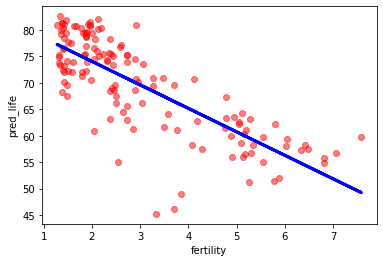

In [71]:
# Plot the fitted line on top of the scatter plot
plt.xlabel('fertility')
plt.ylabel('pred_life')
plt.scatter(X,y, color='red', alpha=0.5)
plt.plot(X_reshaped, y_pred, color='blue', linewidth=3)
